### *Topik: Text Preprocessing*

# **Implementasi Teknik Text Preprocessing untuk Analisis Sentimen Ulasan Pengguna Aplikasi Gojek**

**Oleh Kelompok 4:** <br>
- Benony Gabriel (NIM: 105222002) <br>
- Ariel Yosua Hasibuan (NIM: 105222004) <br>
- Ridho Pratama W (NIM: 105222011) <br>
- Muhammad Sholihin Wiwi (NIM: 105222012) <br>
- Amanda Weza Chania (NIM: 105222018) <br>

### **Introduction**

**Text Preprocessing** adalah suatu proses pengubahan bentuk data yang belum terstruktur menjadi data yang terstruktur sesuai dengan kebutuhan, untuk proses mining yang lebih lanjut (sentiment analysis, peringkasan, clustering dokumen, etc.)<a href="http://malifauzi.lecture.ub.ac.id/files/2016/02/Text-Pre-Processing.pdf">[1]</a>

**Langkah-Lankah Text Preprocessing:**
1. **Parsing**: Memisahkan teks menjadi bagian-bagian yang lebih kecil (seperti kalimat atau kata).
2. **Lexical Analysis (Tokenisasi)**: Memecah teks menjadi token-token (kata) yang lebih kecil.
3. **Stopword Removal**: Menghapus kata-kata umum yang tidak relevan dalam analisis, seperti "dan", "atau", "di".
4. **Phrase Detection**: Mendeteksi frase atau kombinasi kata yang sering muncul bersama (jika diperlukan).
5. **Stemming**: Mengubah kata ke bentuk dasarnya, menghilangkan imbuhan seperti awalan dan akhiran.

**Analisis sentimen** mengacu pada studi analisis teks, pemrosesan bahasa alami, linguistik komputasional untuk mengidentifikasi, mengekstrak, dan mempelajari informasi subjektif dari data tekstual secara ilmiah. Sentimen atau opini adalah sikap pelanggan yang berasal dari ulasan, tanggapan survei, media sosial online, media kesehatan, dll. <a href="https://medium.com/@aliyatulmunna7/analisis-sentimen-aplikasi-gojek-di-playstore-menggunakan-python-dengan-algoritma-random-forest-2e5504090f9b">[2]</a>

**Sumber Data:** <br>
Dataset yang digunakan dalam *Text Preprocessing*  ini diambil dari Kaggle dengan judul *"Gojek🏍 App Reviews Bahasa Indonesia"*. Dataset ini tersedia di tautan berikut: <a href="https://www.kaggle.com/datasets/ucupsedaya/gojek-app-reviews-bahasa-indonesia/data">Gojek🏍 App Reviews Bahasa Indonesia.</a>

**Deskripsi Dataset** <br>
Dataset ini terdiri dari **225.002 baris** dan **5 kolom**, dengan detail sebagai berikut:
1. **`userName`**: Nama pengguna yang memberikan ulasan.  
2. **`content`**: Teks ulasan pengguna.
3. **`score`**: Nilai rating (1–5) dari pengguna.  
4. **`at`**: Waktu ulasan diberikan.
5. **`appVersion`**: Versi aplikasi saat ulasan dibuat.

Kolom `content` dan `score` adalah fitur utama untuk analisis sentimen.


### **Memulai Text Preprocessing**

### 1. Import Library dan Memuat Dataset

In [34]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# Unduh dataset stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
# Memuat dataset
file_path = "dataset/GojekApp-Review-Dataset.csv"
data = pd.read_csv(file_path)

In [36]:
# Melihat banyak baris dan kolom dalam dataset
data.shape

(225002, 5)

In [37]:
# Melihat 10 baris awal dari dataset
data.head(10)

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
5,Arlan Ramlan,Bagus,4,2022-02-01 05:50:40,4.9.3
6,Slamet Hariyanto,Coba dulu,2,2021-12-10 22:40:45,4.9.3
7,Hasan Thio,Ok,5,2022-02-01 03:07:45,4.9.3
8,RAFI BADZLIN,Gimana ini kak pin saya salah terus padahal ud...,1,2022-12-17 08:56:52,4.9.3
9,mariyadi qc,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,2022-02-09 11:27:38,4.9.3


In [38]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225002 non-null  object
 1   content     225000 non-null  object
 2   score       225002 non-null  int64 
 3   at          225002 non-null  object
 4   appVersion  225002 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB


In [39]:
# Mengecek jumlah nilai null di setiap kolom
data.isnull().sum()

userName      0
content       2
score         0
at            0
appVersion    0
dtype: int64

In [40]:
# Melihat data yang memiliki nilai null di kolom 'content'
null_content_data = data[data['content'].isnull()]
print(null_content_data)

             userName content  score                   at appVersion
109839  Hasan Anggara     NaN      5  2022-07-15 00:15:27     4.47.1
216989  Indra Sutanto     NaN      4  2022-02-25 15:45:17     4.26.1


In [41]:
# Menghapus baris yang memiliki nilai null di kolom 'content'
data = data.dropna(subset=['content'])

# Mengecek kembali jumlah nilai null di setiap kolom untuk memastikan penghapusan berhasil
data.isnull().sum()

userName      0
content       0
score         0
at            0
appVersion    0
dtype: int64

In [42]:
data.dtypes

userName      object
content       object
score          int64
at            object
appVersion    object
dtype: object

In [43]:
# Statistik ringkasan dari dataset
data.describe()

,score
count,225000.000000
mean,3.928991
std,1.630557
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


### 2. Labeling Sentimen

Disini kami melakukan labeling sentimen berdasarkan skor (rating) dari user sebagai berikut:
- 1-2: Negatif
- 3: Netral
- 4-5: Positif

In [44]:
# Menambah kolom label sentimen berdasarkan skor
def label_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

data['sentiment'] = data['score'].apply(label_sentiment)

# Memeriksa distribusi label sentimen
sentiment_distribution = data['sentiment'].value_counts()

# Menampilkan contoh data setelah penambahan label sentimen
data_sample = data[['content', 'score', 'sentiment']].head()

sentiment_distribution, data_sample


(sentiment
 Positive    161369
 Negative     54171
 Neutral       9460
 Name: count, dtype: int64,
                                              content  score sentiment
 0                            akun gopay saya di blok      1  Negative
 1  Lambat sekali sekarang ini bosssku apk gojek g...      3   Neutral
 2  Kenapa sih dari kemarin sy buka aplikasi gojek...      4  Positive
 3  Baru download gojek dan hape baru trus ditop u...      1  Negative
 4                                             Mantap      5  Positive)

Hasil labeling sentimen berdasarkan skor:
- Positive: 161.371 ulasan
- Negative: 54.171 ulasan
- Neutral: 9.460 ulasan

### 3. Visualisasi Review Berdasarkan Score

<Axes: xlabel='score'>

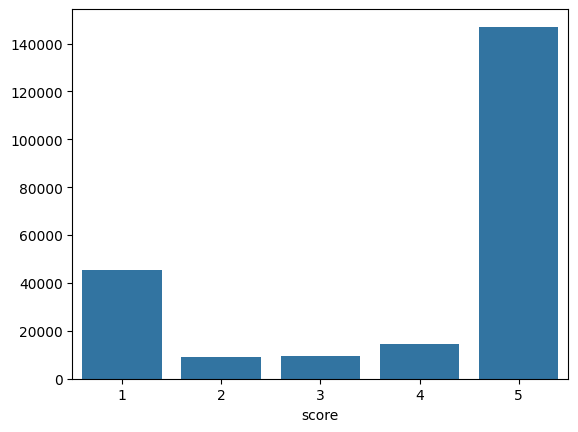

In [45]:
scores = data.groupby(['score']).size()
# plot the scores
sns.barplot(x = scores.index, y = scores.values)

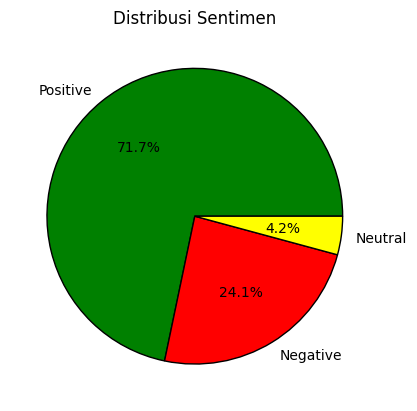

In [50]:
# Visualisasi pie chart untuk distribusi sentiment score

# Definisi wedgeprops untuk memberikan garis tepi
wp = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['green', 'red', 'yellow']  # Warna untuk Negative, Neutral, Positive
fig, ax = plt.subplots()
ax.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=colors, wedgeprops=wp)
ax.set_title('Distribusi Sentimen')
plt.show()

### 3. Text Preprocessing pada kolom content. 

Langkah-langkah yang dilakukan:
- Lowercasing.
- Membersihkan karakter spesial, angka, dan tanda baca.
- Tokenisasi.
- Menghapus stopwords.
- Stemming
- lemmatization

**A). Lowercasing:** 
- Semua teks diubah menjadi huruf kecil.
- Tujuannya adalah untuk memastikan konsistensi karena huruf besar dan kecil dianggap berbeda oleh komputer (misalnya, "Data" dan "data").

In [262]:
# Lowercasing the content column
data['content'] = data['content'].str.lower()

# Menampilkan beberapa baris pertama untuk melihat hasil
print(data[['content']].head(10))

                                             content
0                            akun gopay saya di blok
1  lambat sekali sekarang ini bosssku apk gojek g...
2  kenapa sih dari kemarin sy buka aplikasi gojek...
3  baru download gojek dan hape baru trus ditop u...
4                                             mantap
5                                              bagus
6                                          coba dulu
7                                                 ok
8  gimana ini kak pin saya salah terus padahal ud...
9  biar aman kamu tidak bisa pakai gojek jadi say...


**B). Cleaning (Membersihkan Punctuation):**
- Tanda baca seperti koma, titik, tanda seru, dll ((#$%&'()*+,-./:;<=>?@[\]^_`{|}))., dihapus dari teks.
- Hal ini dilakukan agar teks lebih bersih dan memudahkan analisis.

In [263]:
# Cleaning | Membersihkan karakter spesial, angka, dan tanda baca (#$%&'()*+,-./:;<=>?@[\]^_`{|}).
from string import punctuation


punctuation
data['content'] = data['content'].apply(lambda x: ''.join([char for char in str(x) if char not in punctuation]))


# Menampilkan beberapa baris pertama untuk melihat hasil
print(data[['content']].head(10))  # Menampilkan 5 baris pertama dari kolom 'content' yang sudah dibersihkan


                                             content
0                            akun gopay saya di blok
1  lambat sekali sekarang ini bosssku apk gojek g...
2  kenapa sih dari kemarin sy buka aplikasi gojek...
3  baru download gojek dan hape baru trus ditop u...
4                                             mantap
5                                              bagus
6                                          coba dulu
7                                                 ok
8  gimana ini kak pin saya salah terus padahal ud...
9  biar aman kamu tidak bisa pakai gojek jadi say...


**C). Tokenisasi:**
- Teks dipecah menjadi kata-kata atau unit kecil yang disebut "token".
- Contoh: Kalimat "Saya belajar NLP" menjadi ['Saya', 'belajar', 'NLP'].

In [264]:
# Tokenisasi
data['content_tokenized'] = data['content'].apply(word_tokenize)

# Menampilkan beberapa baris pertama untuk melihat hasil tokenisasi
print(data[['content', 'content_tokenized']].head(2))


try:
    # Tokenisasi
    data['tokens'] = data['content'].apply(word_tokenize)
except Exception as e:
    print(f"Error occurred: {e}")

                                             content  \
0                            akun gopay saya di blok   
1  lambat sekali sekarang ini bosssku apk gojek g...   

                                   content_tokenized  
0                      [akun, gopay, saya, di, blok]  
1  [lambat, sekali, sekarang, ini, bosssku, apk, ...  


**D). Menghapus Stopwords:**
- Stopwords adalah kata-kata umum (seperti "dan", "di", "ke") yang biasanya tidak memiliki makna penting.
- Penghapusan ini bertujuan untuk fokus pada kata-kata bermakna dalam analisis.

In [265]:
# Menghapus stopwords dari kolom 'content'
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

data['content'] = data['content'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama untuk melihat hasil
print(data[['content']].head(10))

                                             content
0                                    akun gopay blok
1                   lambat bosssku apk gojek gk kaya
2  sih kemarin sy buka aplikasi gojek kasih binta...
3  download gojek hape trus ditop u gopay transak...
4                                             mantap
5                                              bagus
6                                               coba
7                                                 ok
8               gimana kak pin salah udah ubah salah
9           biar aman pakai gojek uninstal biar aman


**E). Stemming:**
- Kata-kata diubah ke bentuk dasarnya (root form).
- Menghapus kata-kata yang memiliki imbuhan seperti me-, di-, ke-, -kan, dll.
- Contoh: "berlari", "lari-lari", dan "pelariannya" menjadi "lari".
- Proses ini mengurangi kata ke akar kata untuk menyederhanakan analisis.

In [266]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create a stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to stem the content
def stem_content(text):
    return stemmer.stem(text)

# Apply stemming to the content for rows 1 to 1000
data.loc[1:1000, 'content_stemmed'] = data.loc[1:1000, 'content'].apply(stem_content)

# Menampilkan beberapa baris pertama untuk melihat hasil stemming
print(data.loc[1:1000, ['content', 'content_stemmed']].head(10))


                                              content  \
1                    lambat bosssku apk gojek gk kaya   
2   sih kemarin sy buka aplikasi gojek kasih binta...   
3   download gojek hape trus ditop u gopay transak...   
4                                              mantap   
5                                               bagus   
6                                                coba   
7                                                  ok   
8                gimana kak pin salah udah ubah salah   
9            biar aman pakai gojek uninstal biar aman   
10                             kumpulan driver sampah   

                                      content_stemmed  
1                    lambat bosssku apk gojek gk kaya  
2   sih kemarin sy buka aplikasi gojek kasih binta...  
3   download gojek hape trus top u gopay transaksi...  
4                                              mantap  
5                                               bagus  
6                                   

**F). Menghapus Token yang Kurang dari 4 Karakter:**
- Token dengan panjang kurang dari 4 karakter dihapus (misalnya, "dan", "itu").
- Hal ini bertujuan untuk membuang kata-kata pendek yang seringkali tidak relevan.

In [267]:
# Function to remove tokens less than 4 characters
def remove_short_tokens(text):
    return ' '.join([word for word in text.split() if len(word) >= 4])

# Apply the function to the content_stemmed column for rows 1 to 1000
data.loc[1:1000, 'content_stemmed'] = data.loc[1:1000, 'content_stemmed'].apply(lambda x: remove_short_tokens(x) if pd.notnull(x) else x)

# Menampilkan beberapa baris pertama untuk melihat hasil
print(data.loc[1:1000, ['content_stemmed']].head(10))

                                      content_stemmed
1                           lambat bosssku gojek kaya
2   kemarin buka aplikasi gojek kasih bintang kalo...
3   download gojek hape trus gopay transaksi dialf...
4                                              mantap
5                                               bagus
6                                                coba
7                                                    
8                        gimana salah udah ubah salah
9            biar aman pakai gojek uninstal biar aman
10                               kumpul driver sampah


**G). Lemmatization:**
- Mirip dengan stemming, tetapi lebih canggih karena mempertimbangkan konteks dan struktur kata.
- Contoh: Kata "running" akan menjadi "run" jika kata itu kata kerja, tetapi tetap "running" jika kata benda.

In [268]:
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize the content
def lemmatize_content(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

# Apply lemmatization to the content_stemmed
data['content_lemmatized'] = data['content_stemmed'].apply(lambda x: lemmatize_content(x) if pd.notnull(x) else x)

# Menampilkan beberapa baris pertama untuk melihat hasil lemmatization
print(data[['content_stemmed', 'content_lemmatized']].head(10))

                                     content_stemmed  \
0                                                NaN   
1                          lambat bosssku gojek kaya   
2  kemarin buka aplikasi gojek kasih bintang kalo...   
3  download gojek hape trus gopay transaksi dialf...   
4                                             mantap   
5                                              bagus   
6                                               coba   
7                                                      
8                       gimana salah udah ubah salah   
9           biar aman pakai gojek uninstal biar aman   

                                  content_lemmatized  
0                                                NaN  
1                          lambat bosssku gojek kaya  
2  kemarin buka aplikasi gojek kasih bintang kalo...  
3  download gojek hape trus gopay transaksi dialf...  
4                                             mantap  
5                                              bagus 

### 4. Wordcloud

- Wordcloud adalah representasi visual dari teks yang menampilkan kata-kata dengan ukuran yang bervariasi berdasarkan frekuensi atau kepentingannya. <br>
- Dalam analisis sentimen, wordcloud dapat digunakan untuk mengidentifikasi kata-kata yang sering muncul dalam teks yang memiliki sentimen positif, negatif, atau netral.

Dengan menggunakan wordcloud, kita dapat dengan cepat mendapatkan gambaran umum tentang kata-kata yang dominan dalam berbagai kategori sentimen, yang dapat membantu dalam pengambilan keputusan atau strategi pemasaran.

**A). Wordcloud Sentimen Positif:** 
- Menampilkan kata-kata yang sering muncul dalam teks dengan sentimen positif, membantu mengidentifikasi tema atau topik yang disukai.

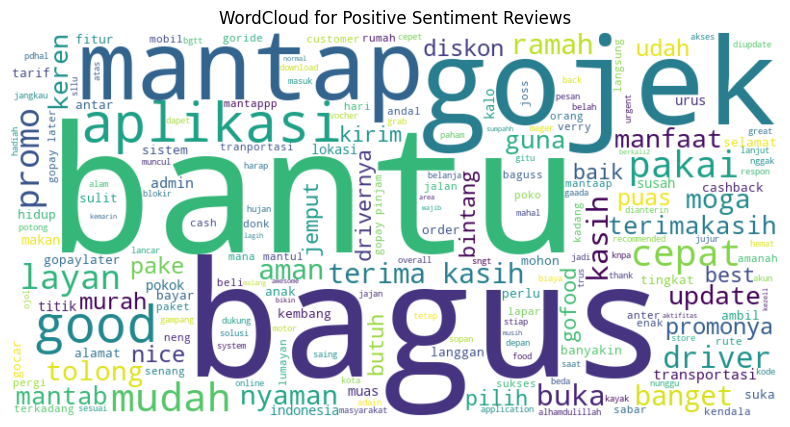

In [269]:
from wordcloud import WordCloud

# Filter the dataset for positive sentiments
positive_reviews = data[data['sentiment'] == 'Positive']

# Combine all positive reviews into a single string
positive_text = ' '.join(positive_reviews['content_lemmatized'].dropna())

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Sentiment Reviews')
plt.show()

**B). Worldcloud Sentimen Negatif:** 
- Menampilkan kata-kata yang sering muncul dalam teks dengan sentimen negatif, membantu mengidentifikasi masalah atau keluhan yang sering diungkapkan.


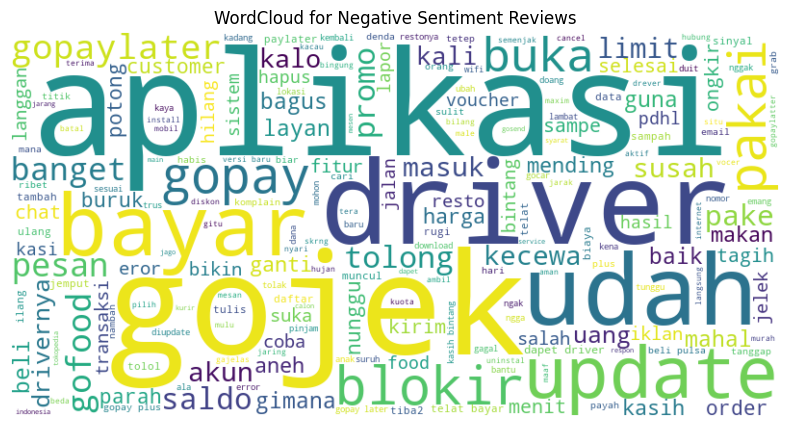

In [270]:
# Filter the dataset for negative sentiments
negative_reviews = data[data['sentiment'] == 'Negative']

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews['content_lemmatized'].dropna())

# Generate the WordCloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Sentiment Reviews')
plt.show()

**C). Wordcloud Sentimen Netral**: 
- Menampilkan kata-kata yang sering muncul dalam teks dengan sentimen netral, membantu mengidentifikasi informasi umum atau deskriptif.

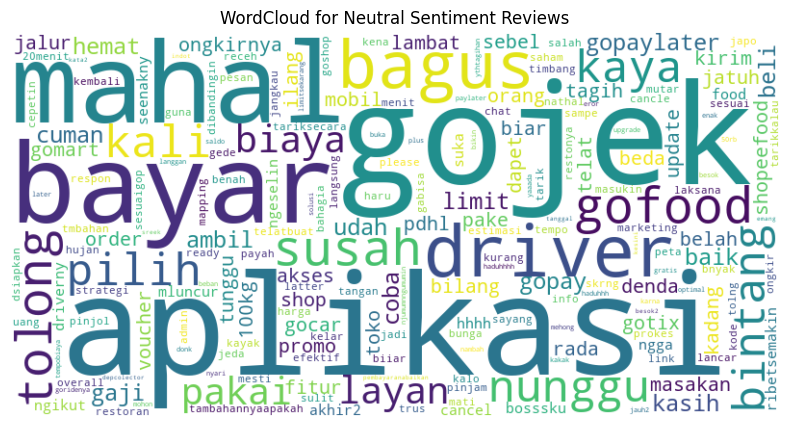

In [271]:
from wordcloud import WordCloud

# Filter the dataset for neutral sentiments
neutral_reviews = data[data['sentiment'] == 'Neutral']

# Combine all neutral reviews into a single string
neutral_text = ' '.join(neutral_reviews['content_lemmatized'].dropna())

# Generate the WordCloud
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Sentiment Reviews')
plt.show()